downloading ./spudtr/data/sub000p3.ms3000.epochs.feather from https://zenodo.org/record/3968485/files/ ... please wait


/home/qiz001/.conda/envs/spudtrD/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


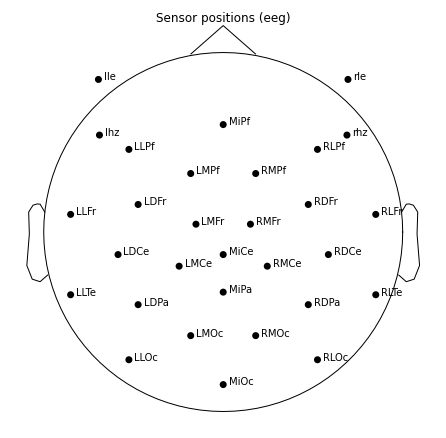

In [1]:
#%matplotlib qt5
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import mne
from collections import OrderedDict

from spudtr import DATA_DIR, mneutils, get_demo_df

#_f = "/home/qin/qin/mkpy_data_examples/sub000p3.ms3000.epochs.h5"
#epochs_df = pd.read_hdf(_f, key="ms3000")
#_f = "/home/qin/qin/Projects/spudtr/spudtr/data/sub000p3.ms3000.epochs.feather"
#epochs_df = pd.read_feather(_f)
epochs_df = get_demo_df('sub000p3.ms3000.epochs.feather')

eeg_streams = ['lle', 'lhz', 'MiPf', 'LLPf', 'RLPf',
       'LMPf', 'RMPf', 'LDFr', 'RDFr', 'LLFr', 'RLFr', 'LMFr', 'RMFr', 'LMCe',
       'RMCe', 'MiCe', 'MiPa', 'LDCe', 'RDCe', 'LDPa', 'RDPa', 'LMOc', 'RMOc',
       'LLTe', 'RLTe', 'LLOc', 'RLOc', 'MiOc', 'rle', 'rhz']

# plot montage
sfreq = 500

montage =  mneutils.streams2mne_digmont(eeg_streams)
montage.plot(kind='topomap', show_names=True);


600 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


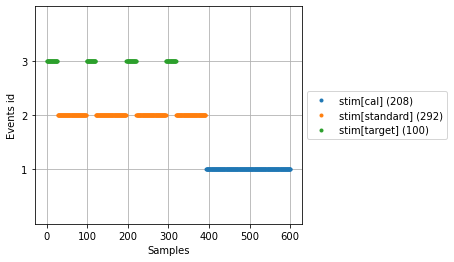

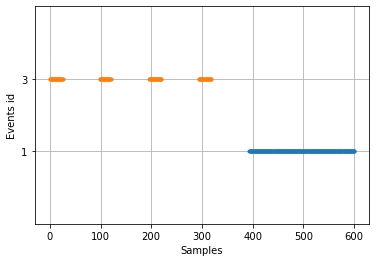

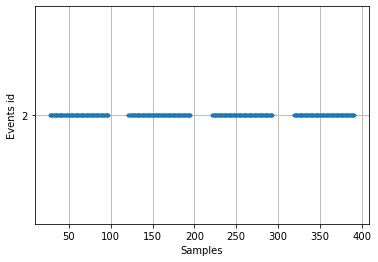

In [2]:
# build a minimal spudtr epochs_df with one row per event
epoch_id = "epoch_id"
time = "time_ms"
#time = "match_time"
time_stamp = 0
categories = "stim"

mne_event_id, mne_events = mneutils._categories2eventid(
    epochs_df, categories, epoch_id, time, time_stamp
)
epochs = mneutils.spudtr2mne_epochs(epochs_df, eeg_streams, time, epoch_id, sfreq, mne_events, mne_event_id)

events_list = list(mne_event_id.keys())
# plot events
fig = mne.viz.plot_events(mne_events,event_id=mne_event_id)
fig.subplots_adjust(right=0.7)

events_left = mne.pick_events(mne_events, include=[1,3])
fig = mne.viz.plot_events(events_left)
fig.subplots_adjust(right=0.7) 

events_right = mne.pick_events(mne_events, include=[2,4])
fig = mne.viz.plot_events(events_right)
fig.subplots_adjust(right=0.7) 

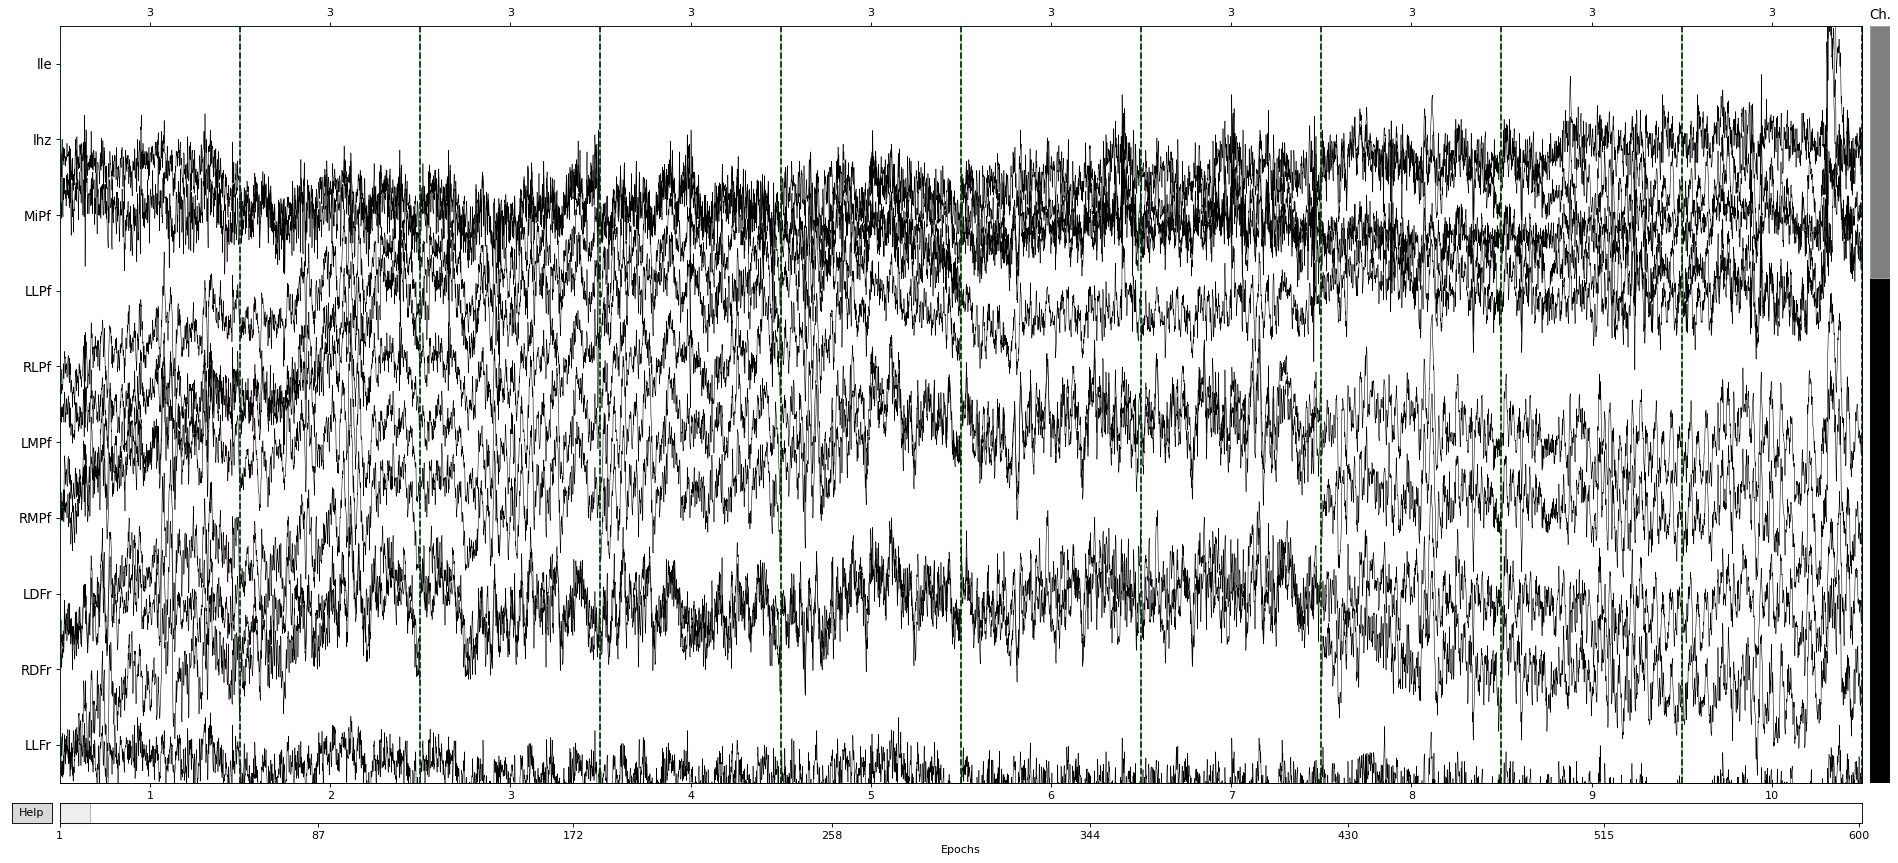

In [3]:
# show epochs 10 channels first
epochs.plot(picks='eeg', scalings='auto', show=True, block=True,n_channels=10, n_epochs=10);

600 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


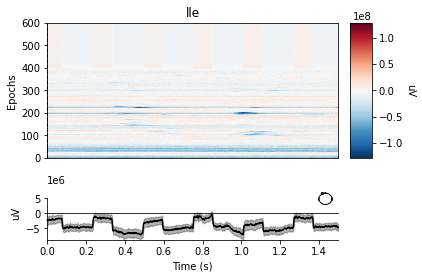

600 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


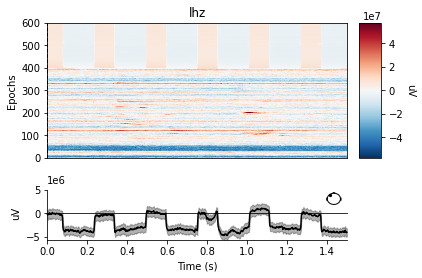

600 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


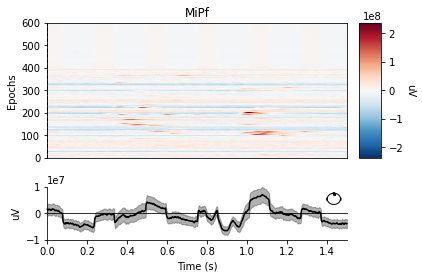

600 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


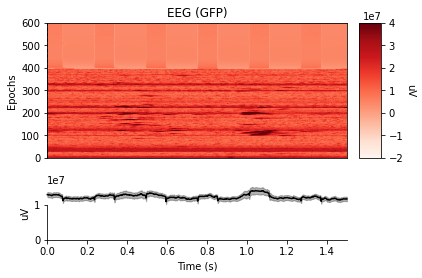

In [4]:
# To plot individual channels as an image
for i_channel in range(3):
    epochs.plot_image(i_channel, cmap="interactive", sigma=1.0);

epochs.plot_image(cmap="interactive", sigma=1.5, vmin=-2e7, vmax=4.0e7);


600 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


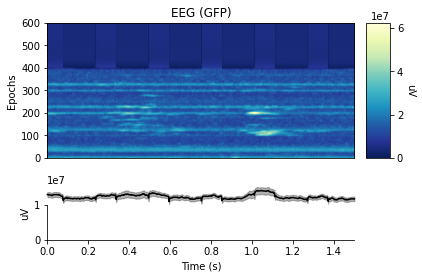

In [5]:
# To plot all channels by calculating the global field power
epochs.plot_image(combine="gfp", sigma=3.5, cmap="YlGnBu_r");


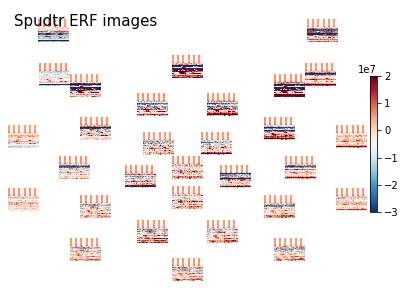

In [6]:
# plotting channelwise information arranged into a shape of the channel array.
epochs.plot_topo_image(
    vmin=-3e7,
    vmax=2.0e7,
    title="Spudtr ERF images",
    sigma=2.0,
    fig_facecolor="w",
    font_color="k",
);


    Using multitaper spectrum estimation with 7 DPSS windows


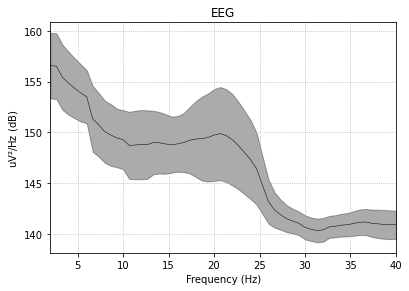

    Using multitaper spectrum estimation with 7 DPSS windows


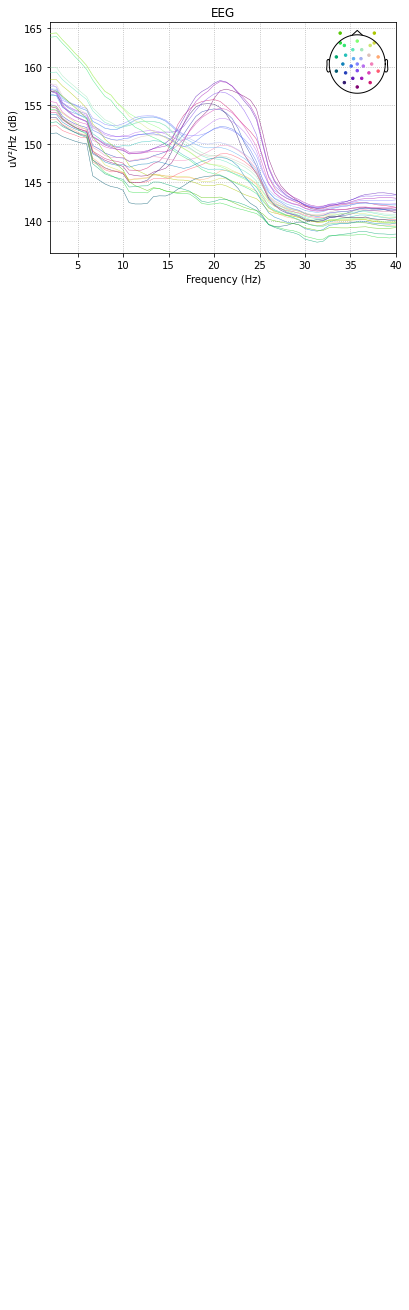

    Using multitaper spectrum estimation with 7 DPSS windows


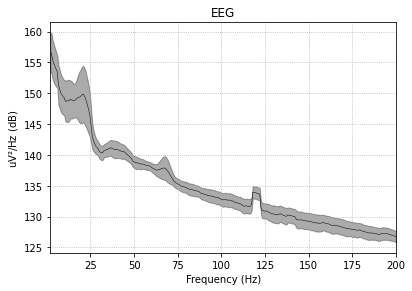

    Using multitaper spectrum estimation with 7 DPSS windows


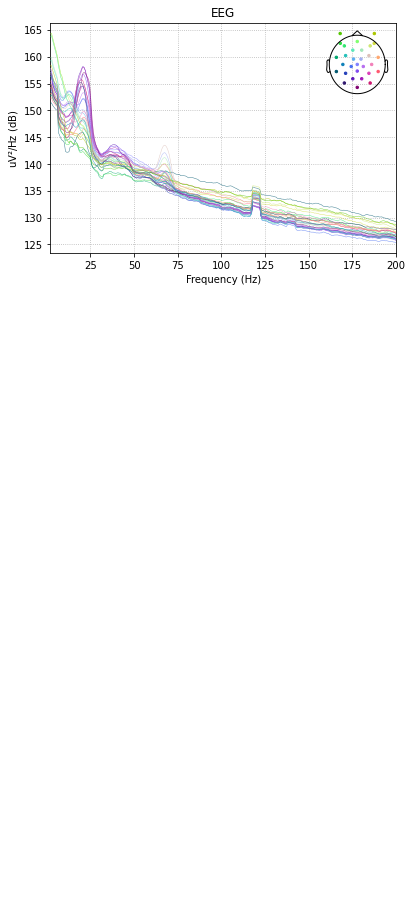

    Using multitaper spectrum estimation with 7 DPSS windows


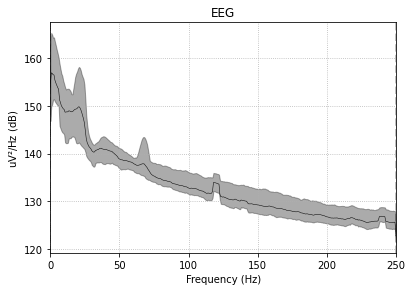

    Using multitaper spectrum estimation with 7 DPSS windows


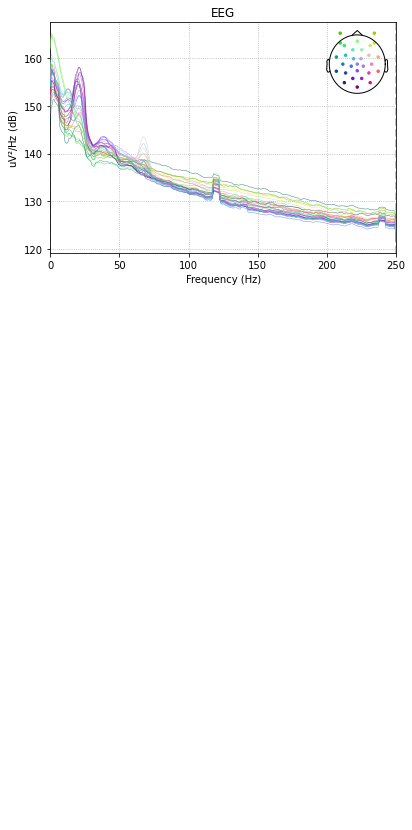

In [7]:
# power spectral density (psd), average spectrum by taking the mean across epochs
epochs.plot_psd(fmin=2.0, fmax=40.0, spatial_colors=False, average=True)
epochs.plot_psd(fmin=2.0, fmax=40.0, spatial_colors=True, average=False);
epochs.plot_psd(fmin=2, fmax=200, spatial_colors=False, average=True)
epochs.plot_psd(fmin=2, fmax=200, spatial_colors=True, average=False);
epochs.plot_psd(area_mode='range', tmax=10.0, show=True, spatial_colors=False, average=True)
epochs.plot_psd(area_mode='range', tmax=10.0, show=True, spatial_colors=True, average=False);

    Using multitaper spectrum estimation with 7 DPSS windows


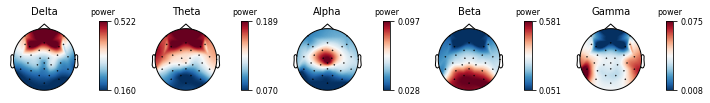

In [8]:
# the spatial distributions of the PSD in various frequency bands
epochs.plot_psd_topomap(ch_type="eeg", normalize=True);

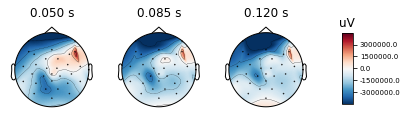

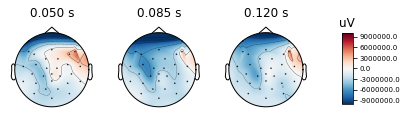

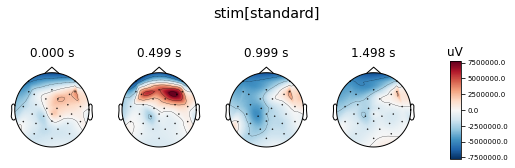

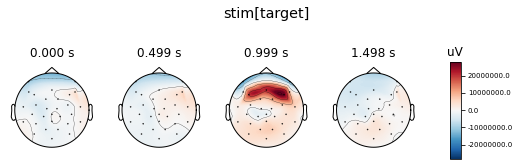

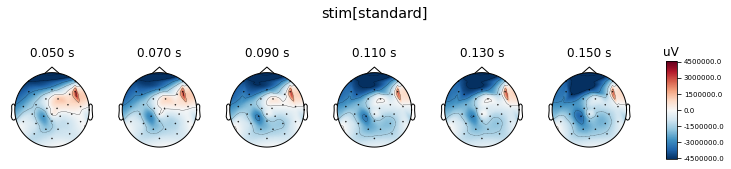

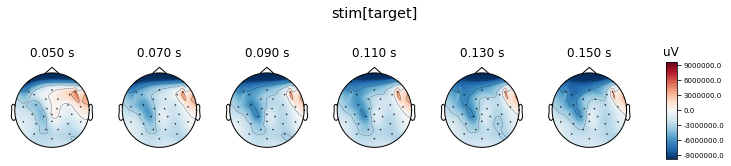

In [9]:
# created evokeds from epochs
av1 = epochs[events_list[1]].average()
av2 = epochs[events_list[2]].average()
# showing topographies at specific time points:
times = np.arange(0.05, 0.151, 0.035)
av1.plot_topomap(times, ch_type="eeg", time_unit="s");
av2.plot_topomap(times, ch_type="eeg", time_unit="s");

# If times is set to None at most 10 regularly spaced topographies will be shown:
av1.plot_topomap(ch_type="eeg", time_unit="s", title=events_list[1]);
av2.plot_topomap(ch_type="eeg", time_unit="s", title=events_list[2]);

# compute averages of 50 ms bins centered on these time points to reduce the noise in the topographies:
times = np.arange(0.05, 0.151, 0.02)
av1.plot_topomap(times, ch_type="eeg", average=0.05, time_unit="s", title=events_list[1]);
av2.plot_topomap(times, ch_type="eeg", average=0.05, time_unit="s", title=events_list[2]);

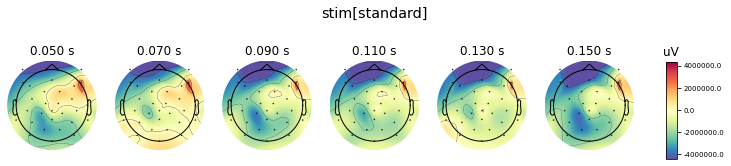

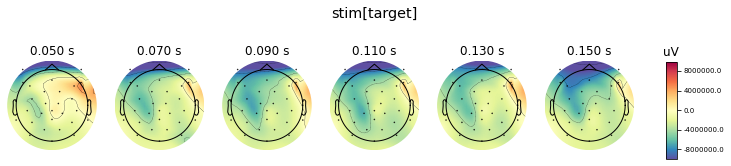

In [10]:
# Additional plot_topomap options
av1.plot_topomap(
    times,
    ch_type="eeg",
    cmap="Spectral_r",
    res=32,
    outlines="skirt",
    contours=4,
    time_unit="s",
    title=events_list[1]
);
av2.plot_topomap(
    times,
    ch_type="eeg",
    cmap="Spectral_r",
    res=32,
    outlines="skirt",
    contours=4,
    time_unit="s",
    title=events_list[2]
);


Initializing animation...


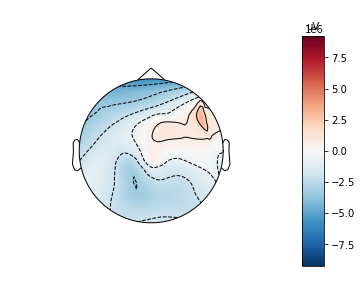

Initializing animation...


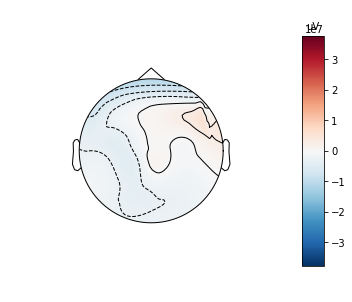

In [11]:
# Animating the topomap
av1.animate_topomap(
    ch_type="eeg", times=times, frame_rate=10, time_unit="s"
);
av2.animate_topomap(
    ch_type="eeg", times=times, frame_rate=10, time_unit="s"
);

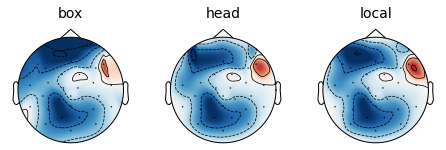

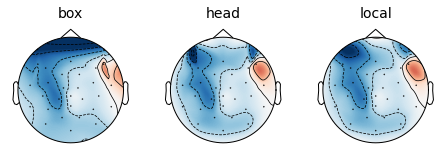

In [12]:
# various extrapolate, By default extrapolate='box' is used 
extrapolations = ["box", "head", "local"]
fig, axes = plt.subplots(figsize=(7.5, 2.5), ncols=3)
# Here we look at EEG channels, and use a custom head sphere to get all the
# sensors to be well within the drawn head surface
for ax, extr in zip(axes, extrapolations):
    av1.plot_topomap(
        0.1,
        ch_type="eeg",
        size=3,
        extrapolate=extr,
        axes=ax,
        show=False,
        colorbar=False,
    )
    ax.set_title(extr, fontsize=14);
    
fig, axes = plt.subplots(figsize=(7.5, 2.5), ncols=3)
# Here we look at EEG channels, and use a custom head sphere to get all the
# sensors to be well within the drawn head surface
for ax, extr in zip(axes, extrapolations):
    av2.plot_topomap(
        0.1,
        ch_type="eeg",
        size=3,
        extrapolate=extr,
        axes=ax,
        show=False,
        colorbar=False,
    )
    ax.set_title(extr, fontsize=14);


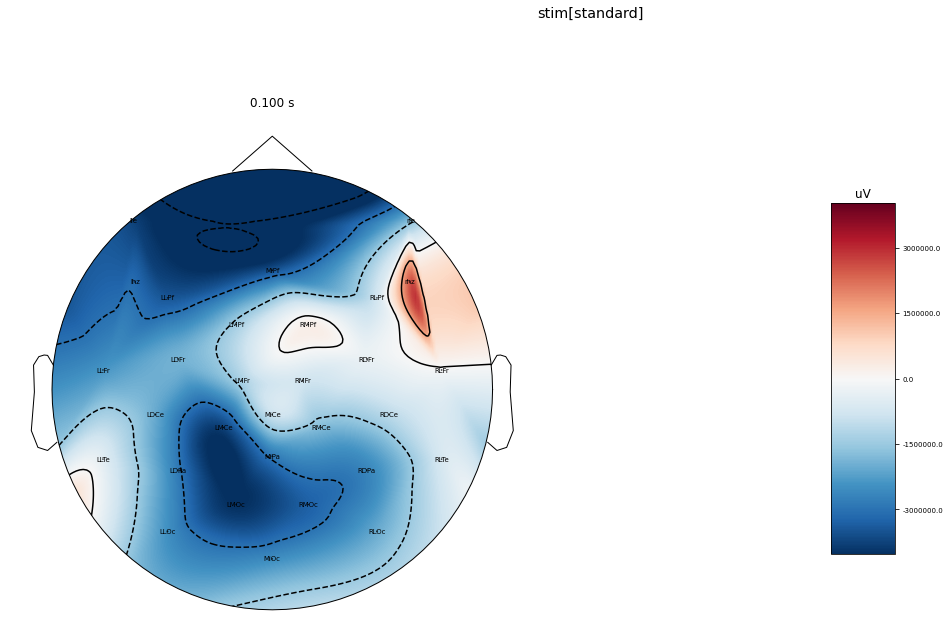

<Figure size 432x288 with 0 Axes>

In [13]:
# plot eeg data as topomap at a single time point, add channel labels, title and adjust plot margins
av1.plot_topomap(
    0.1,
    ch_type="eeg",
    show_names=True,
    colorbar=True,
    size=6,
    res=128,
    title=events_list[1],
    time_unit="s",
)
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.88);


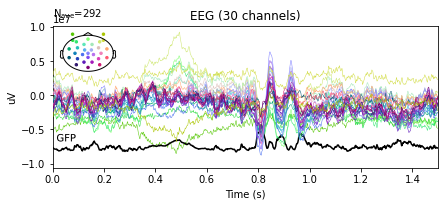

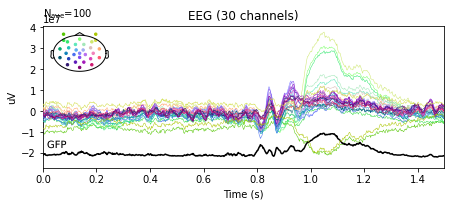

In [14]:
# Visualize Evoked data
av1.plot(spatial_colors=True, gfp=True, picks="eeg");
av2.plot(spatial_colors=True, gfp=True, picks="eeg");


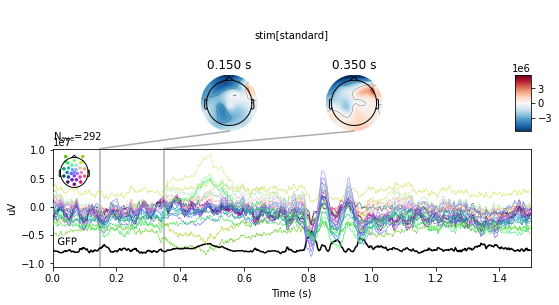

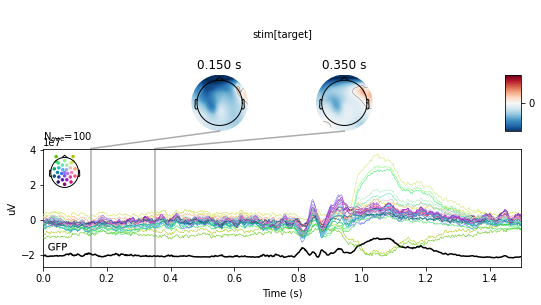

In [15]:
# combine the two kinds of plots in one figure to display of spatio-temporal dynamics
ts_args = dict(gfp=True, time_unit="s")
topomap_args = dict(sensors=False, time_unit="s")
av1.plot_joint(
    title=events_list[1],
    times=[0.15, 0.35],
    ts_args=ts_args,
    topomap_args=topomap_args,
);
av2.plot_joint(
    title=events_list[2],
    times=[0.15, 0.35],
    ts_args=ts_args,
    topomap_args=topomap_args,
);


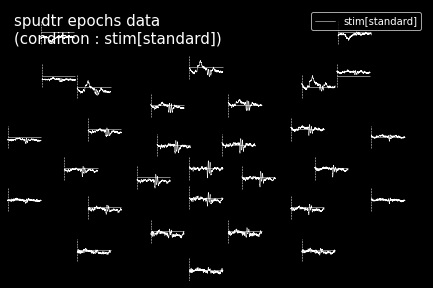

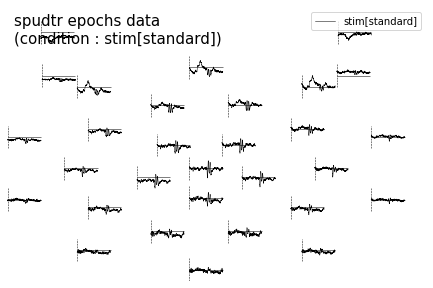

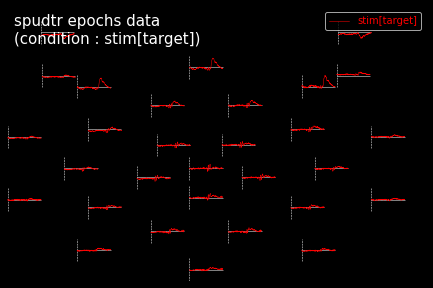

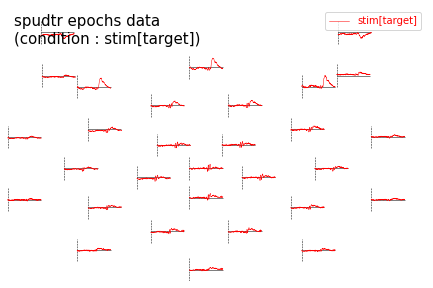

In [16]:
# plot the sensor data as a topographical view
title = "spudtr epochs data\n(condition : %s)"
av1.plot_topo(
    title=title % av1.comment, background_color="k", color=["white"]
)
mne.viz.plot_evoked_topo(
    av1, title=title % av1.comment, background_color="w", color=["black"]
);

title = "spudtr epochs data\n(condition : %s)"
av2.plot_topo(
    title=title % av2.comment, background_color="k", color=["red"]
)
mne.viz.plot_evoked_topo(
    av2, title=title % av2.comment, background_color="w", color=["red"]
);

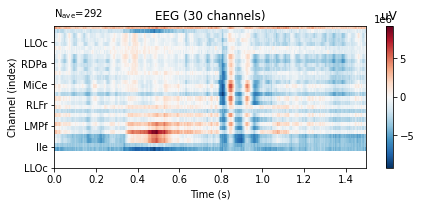

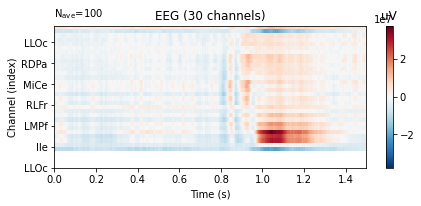

In [17]:
# plot the activations as images
av1.plot_image(exclude=[], time_unit="s");
av2.plot_image(exclude=[], time_unit="s");


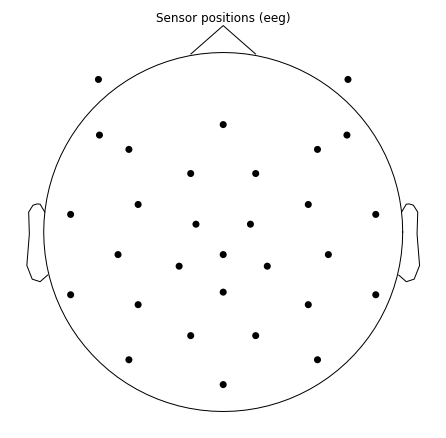

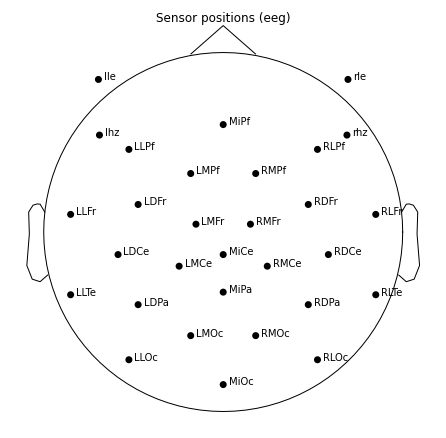

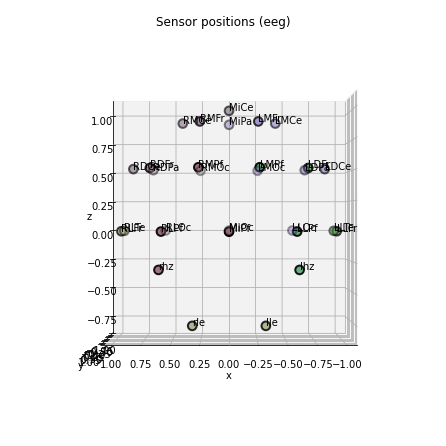

In [18]:
# Plot Sensor Position
av1.plot_sensors()
av2.plot_sensors(show_names=True)
#evokeds.plot_sensors('3d',show_names=True)
av1.plot_sensors(kind='3d',ch_type='eeg',ch_groups='position',show_names=True);

Applying baseline correction (mode: mean)


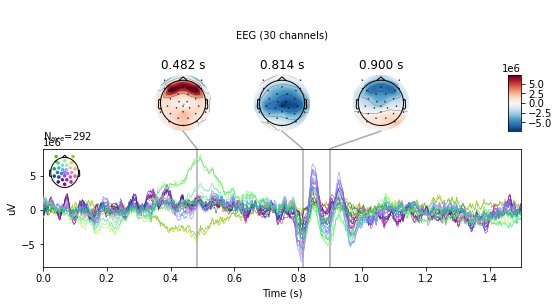

Applying baseline correction (mode: mean)


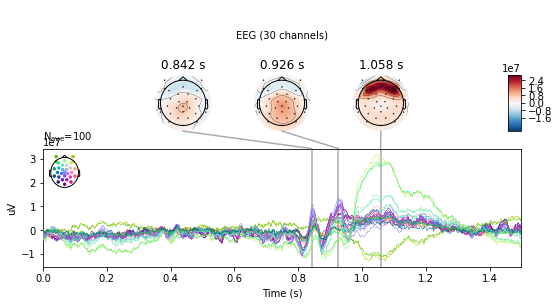

In [19]:
# Applying baseline correction (mode: mean)
av1.apply_baseline((None, None))
av1.plot_joint();
av2.apply_baseline((None, None))
av2.plot_joint();


600 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
600 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


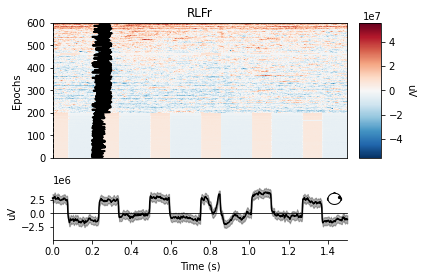

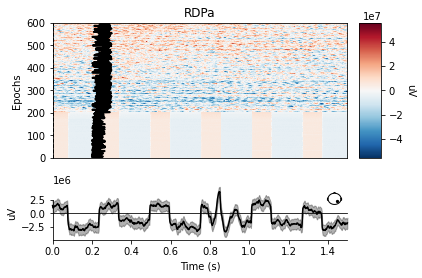

In [20]:
# Visualize channel over epochs as an image
from sklearn.manifold import spectral_embedding  # noqa
from sklearn.metrics.pairwise import rbf_kernel  # noqa

def order_func(times, data):
    this_data = data[:, (times > 0.0) & (times < 0.5)]
    this_data /= np.sqrt(np.sum(this_data ** 2, axis=1))[:, np.newaxis]
    return np.argsort(
        spectral_embedding(
            rbf_kernel(this_data, gamma=1.0), n_components=1, random_state=0
        ).ravel()
    )

good_pick = 10  # channel with a clear evoked response
bad_pick = 20  # channel with no evoked response

# We'll also plot a sample time onset for each trial
# plt_times = np.linspace(1, 0.2, len(epochs))
plt_times = np.linspace(0.2, 0.3, len(epochs))

plt.close("all")
mne.viz.plot_epochs_image(
    epochs,
    [good_pick, bad_pick],
    sigma=0.5,
    order=order_func,
    overlay_times=plt_times,
    show=True,
);

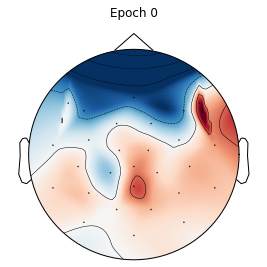

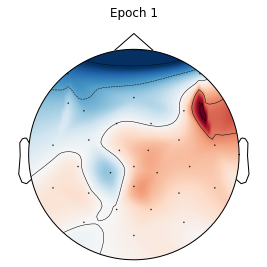

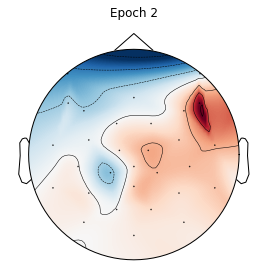

In [21]:
# plot topomap for epoch by epoch (average)
epochs_df_tmp = epochs_df.copy()

epochs_mean = epochs_df_tmp.groupby(["epoch_id"]).apply(
    lambda x: x[eeg_streams].mean(axis=0)
)
info = mne.create_info(
    montage.ch_names, sfreq=sfreq, ch_types="eeg", montage=montage
)
for epoch_i in range(3):
    y1 = epochs_mean.iloc[epoch_i, :]
    ya = list(y1.values)
    fig, ax = plt.subplots()
    mne.viz.plot_topomap(ya, info, axes=ax, show=False)
    ax.set(title=f"Epoch {epoch_i}");


Computing data rank from covariance with rank=None
    Using tolerance 0.22 (2.2e-16 eps * 30 dim * 3.3e+13  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors


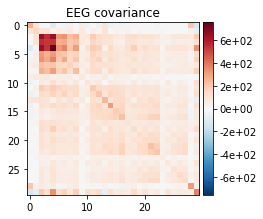

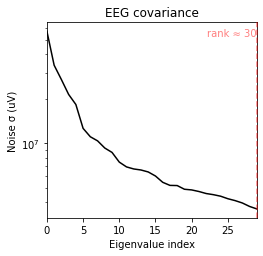

In [22]:
# Compute regularized noise covariance
noise_cov = mne.compute_covariance(epochs, tmax=10., method='shrunk', rank=None,
                                   verbose='error')
fig_cov, fig_spectra = mne.viz.plot_cov(noise_cov, info);

Computing data rank from covariance with rank=None
    Using tolerance 0.22 (2.2e-16 eps * 30 dim * 3.3e+13  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Computing data rank from covariance with rank={'eeg': 30}
    Setting small EEG eigenvalues to zero (without PCA)
    Created the whitener using a noise covariance matrix with rank 30 (0 small eigenvalues omitted)


<ipython-input-23-5c34b331f253>:2: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  av1.plot_white(noise_cov);


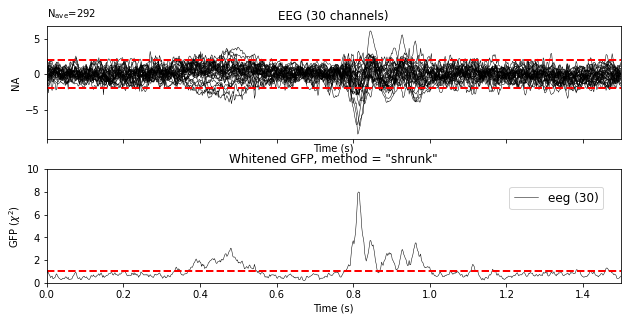

Computing data rank from covariance with rank=None
    Using tolerance 0.22 (2.2e-16 eps * 30 dim * 3.3e+13  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Computing data rank from covariance with rank={'eeg': 30}
    Setting small EEG eigenvalues to zero (without PCA)
    Created the whitener using a noise covariance matrix with rank 30 (0 small eigenvalues omitted)


<ipython-input-23-5c34b331f253>:3: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  av2.plot_white(noise_cov);


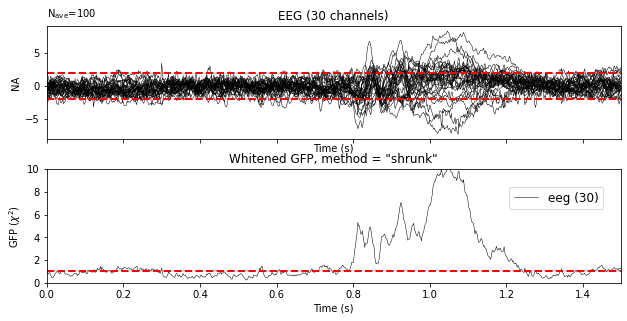

In [23]:
# Show whitening
av1.plot_white(noise_cov);
av2.plot_white(noise_cov);

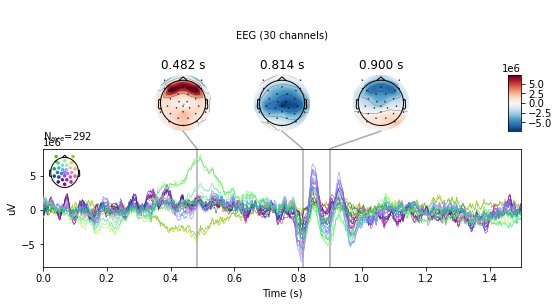

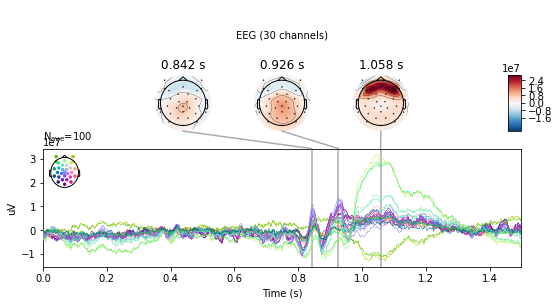

In [24]:
# select subsets of Epochs
joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))
av1.plot_joint(show=True, **joint_kwargs);
av2.plot_joint(show=True, **joint_kwargs);

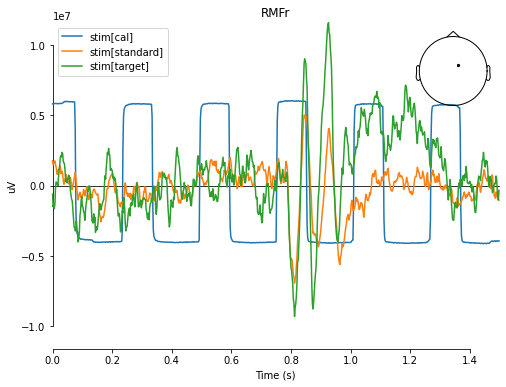

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


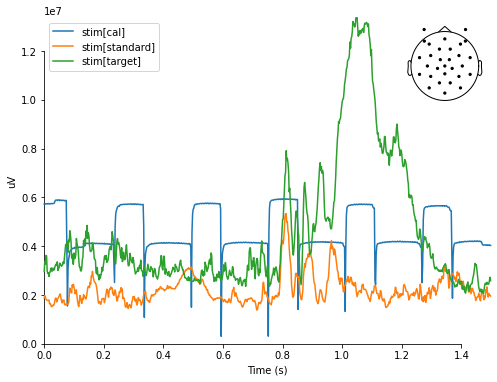

In [25]:
#  Estimating evoked responses for one channel
pick = av1.ch_names.index(eeg_streams[12])
evokeds_dict = {cond: epochs[cond].average() for cond in mne_event_id}
mne.viz.plot_compare_evokeds(
    evokeds_dict, 
    show_sensors="upper right", picks=pick, split_legend=False
);

# Estimating evoked responses

mne.viz.plot_compare_evokeds(evokeds_dict,
                              show_sensors='upper right');

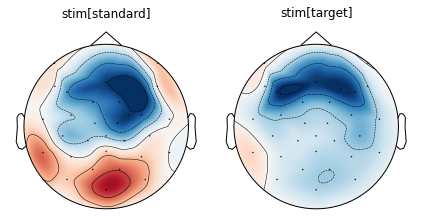

In [26]:
# compare two evokeds
fig, ax = plt.subplots(1, 2, figsize=(6, 4))
av1.plot_topomap(
        0.3,
        ch_type="eeg",
        size=2,
        extrapolate=extr,
        axes=ax[0],
        show=False,
        colorbar=False
)
ax[0].set(title=events_list[1])

av2.plot_topomap(
        0.3,
        ch_type="eeg",
        size=2,
        extrapolate=extr,
        axes=ax[1],
        show=False,
        colorbar=False
)
ax[1].set(title=events_list[2])

mne.viz.tight_layout()
plt.show()


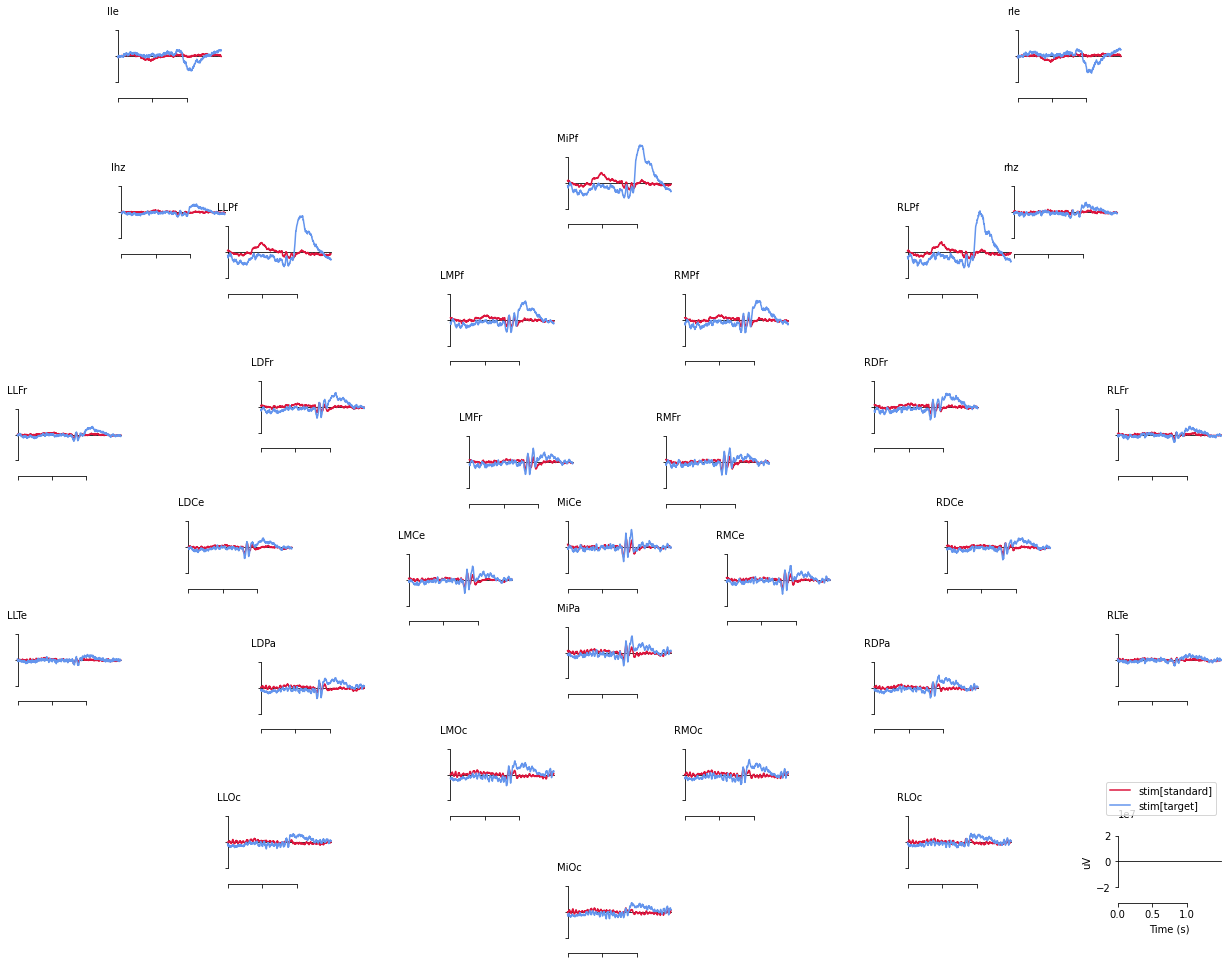

[<Figure size 1296x1008 with 31 Axes>]

In [27]:
evoked_dict = dict()
evoked_dict[av1.comment] = av1
evoked_dict[av2.comment] = av2
colors = {events_list[1]: "Crimson", events_list[2]: "CornFlowerBlue"}
linestyles = {events_list[1]: '-', events_list[2]: '--'}
mne.viz.plot_compare_evokeds(evoked_dict, picks="eeg", colors=colors,
                             split_legend=False,
                             axes="topo")

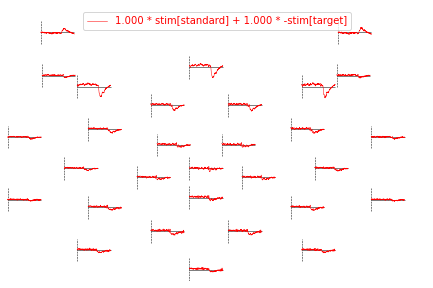

In [28]:
# Evoked objects can also be combined to show the difference wave
evoked_diff = mne.combine_evoked([av1, -av2], weights='equal')
evoked_diff.plot_topo(color='r', legend=True);


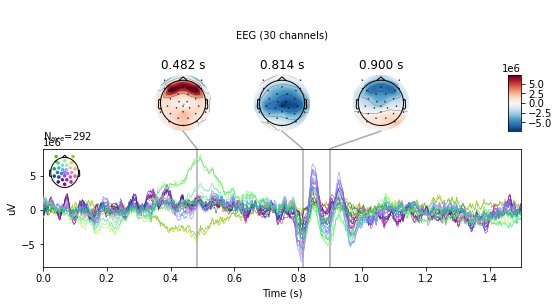

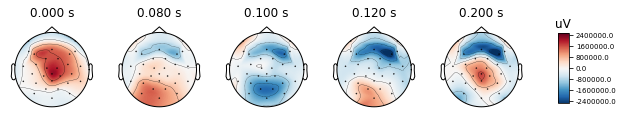

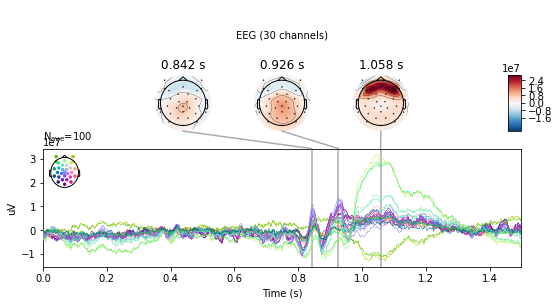

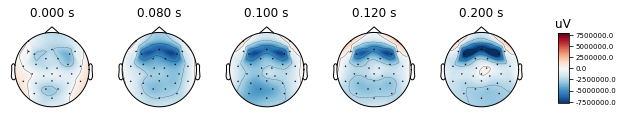

In [29]:
# view of each subsets of Evoked object
av1.plot_joint(picks='eeg')
av1.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')

av2.plot_joint(picks='eeg')
av2.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg');


combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


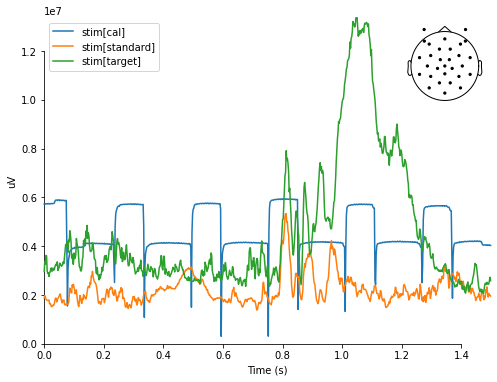

In [30]:
# plot compare evokeds
evokeds_dict = {cond: epochs[cond].average() for cond in mne_event_id}
fig = mne.viz.plot_compare_evokeds(evokeds_dict,
                              show_sensors='upper right')


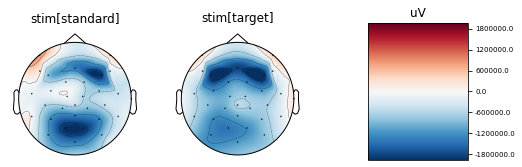

In [31]:
# Plotting topographic maps of evoked data for more advanced topomap plotting options

fig, ax = plt.subplots(1, 3, figsize=(8, 2))
kwargs = dict(times=0.1, show=False, time_unit='s')
av1.plot_topomap(axes=ax[0], colorbar=True, **kwargs)
av2.plot_topomap(axes=ax[1], colorbar=False, **kwargs)
for ax, title in zip(ax[:2], [events_list[1], events_list[2]]):
    ax.set_title(title)
plt.show()

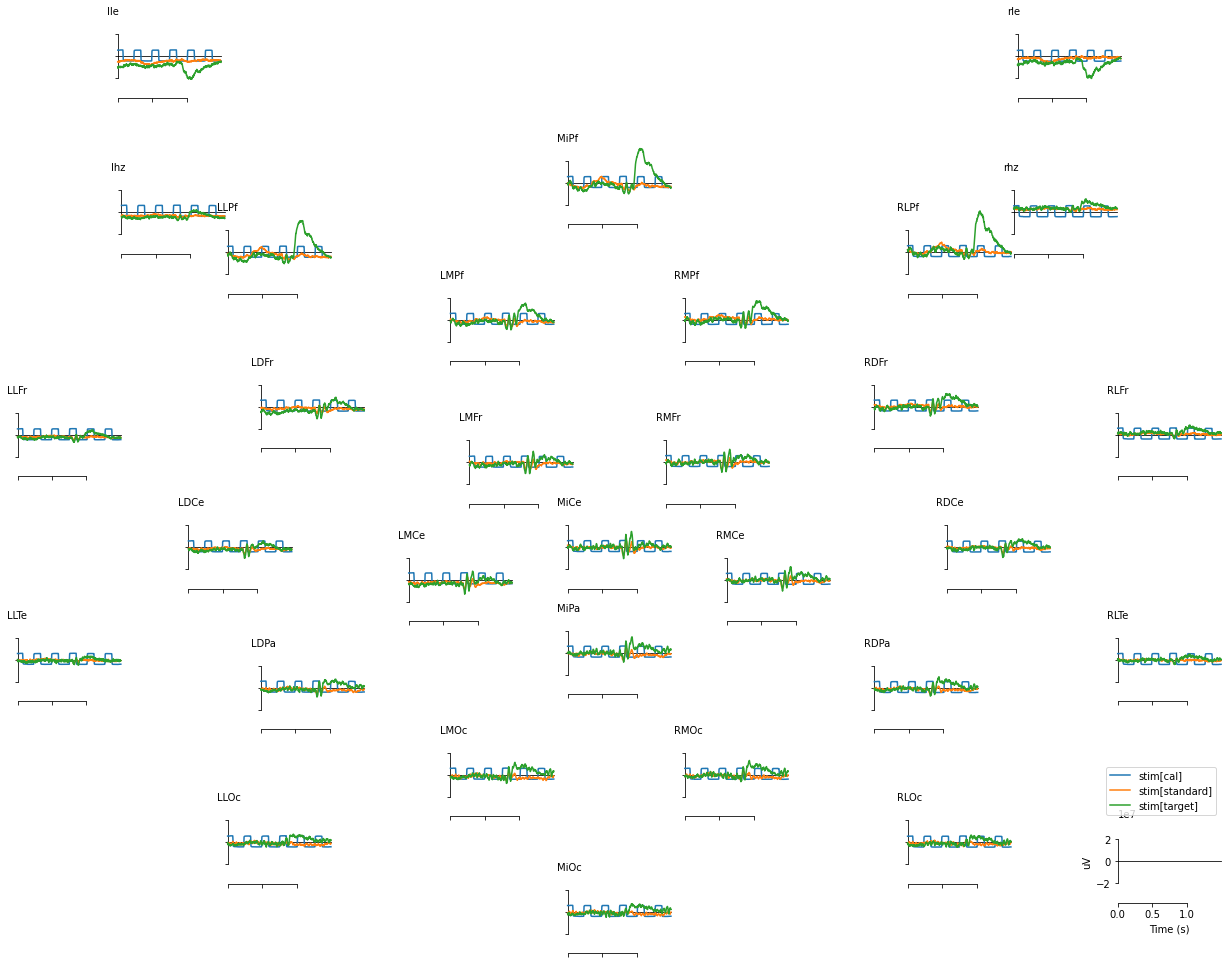

[<Figure size 1296x1008 with 31 Axes>]

In [32]:
# compare evokeds for all evokes
mne.viz.plot_compare_evokeds(evokeds_dict, picks="eeg",
                             split_legend=False,
                             axes="topo")